## Preprocessing

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Identify the target variable
target = application_df["IS_SUCCESSFUL"]

# Identify the feature variables
features = application_df.drop(columns=["IS_SUCCESSFUL"])

In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
features = application_df.drop(columns=["EIN", "NAME"])

In [6]:
# Determine the number of unique values in each column.
print(features.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df["APPLICATION_TYPE"].value_counts()
print(application_type_counts)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500
application_types_to_replace = application_type_counts[application_type_counts < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app, "Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

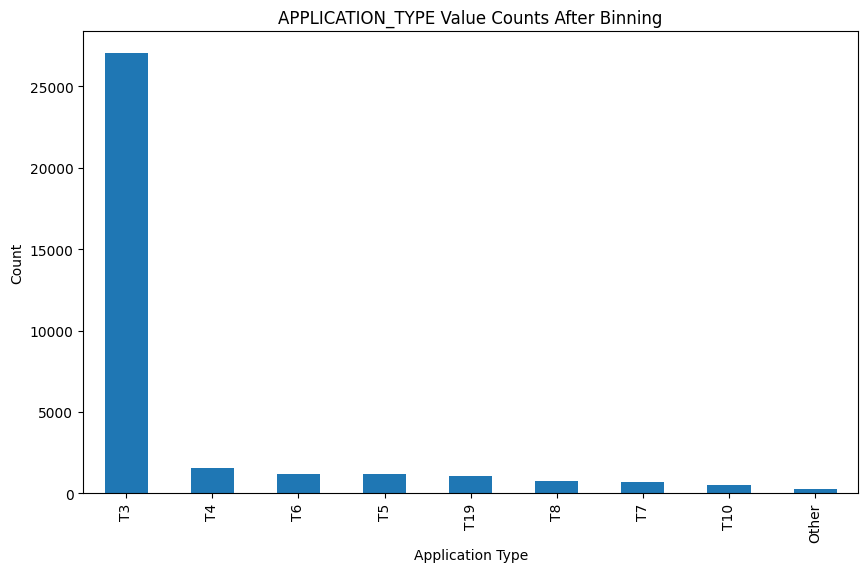

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the value counts for APPLICATION_TYPE before binning
application_type_counts.plot(kind='bar', figsize=(10, 6), title='APPLICATION_TYPE Value Counts Before Binning')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.savefig('application_type_before_binning.png', bbox_inches='tight')

# Plot the value counts for APPLICATION_TYPE after binning
application_df['APPLICATION_TYPE'].value_counts().plot(kind='bar', figsize=(10, 6), title='APPLICATION_TYPE Value Counts After Binning')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.savefig('application_type_after_binning.png', bbox_inches='tight')

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df["CLASSIFICATION"].value_counts()
print(classification_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
# Filter classification_counts where count is greater than 1
classification_counts_gt_1 = classification_counts[classification_counts > 1]

# Print the filtered classification counts
print(classification_counts_gt_1)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64


In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
# Choose a cutoff value
cutoff_value_class = 1000
classifications_to_replace = classification_counts[classification_counts < cutoff_value_class].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies` for APPLICATION_TYPE and CLASSIFICATION columns
encoded_df = pd.get_dummies(application_df, columns=["APPLICATION_TYPE", "CLASSIFICATION"])

# Check the shape of the encoded dataframe
encoded_df.shape

(34299, 25)

In [14]:
# Check for missing values
print(application_df.isnull().sum())


EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64


In [15]:
# Convert categorical variables to numeric using one-hot encoding
encoded_df = pd.get_dummies(application_df, columns=["APPLICATION_TYPE", "CLASSIFICATION"])

# Verify data types
print(encoded_df.dtypes)

EIN                        int64
NAME                      object
AFFILIATION               object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
APPLICATION_TYPE_Other     uint8
APPLICATION_TYPE_T10       uint8
APPLICATION_TYPE_T19       uint8
APPLICATION_TYPE_T3        uint8
APPLICATION_TYPE_T4        uint8
APPLICATION_TYPE_T5        uint8
APPLICATION_TYPE_T6        uint8
APPLICATION_TYPE_T7        uint8
APPLICATION_TYPE_T8        uint8
CLASSIFICATION_C1000       uint8
CLASSIFICATION_C1200       uint8
CLASSIFICATION_C2000       uint8
CLASSIFICATION_C2100       uint8
CLASSIFICATION_C3000       uint8
CLASSIFICATION_Other       uint8
dtype: object


In [16]:
# Split our preprocessed data into our features and target arrays
X = encoded_df.drop(columns=["IS_SUCCESSFUL"])
y = encoded_df["IS_SUCCESSFUL"]

from sklearn.model_selection import train_test_split

# Split the preprocessed data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (27439, 24)
Testing features shape: (6860, 24)
Training target shape: (27439,)
Testing target shape: (6860,)


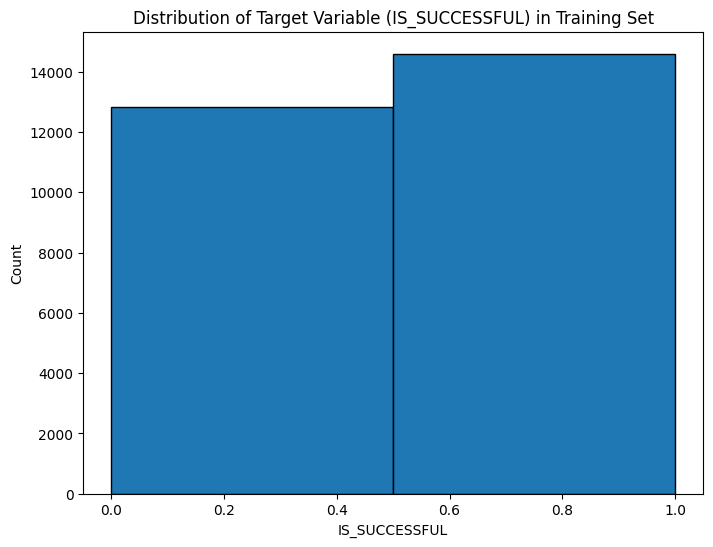

In [17]:
# Create a histogram plot of the target variable (IS_SUCCESSFUL)
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=2, edgecolor='black')
plt.title('Distribution of Target Variable (IS_SUCCESSFUL) in Training Set')
plt.xlabel('IS_SUCCESSFUL')
plt.ylabel('Count')
plt.savefig('target_distribution_train.png', bbox_inches='tight')
plt.show()



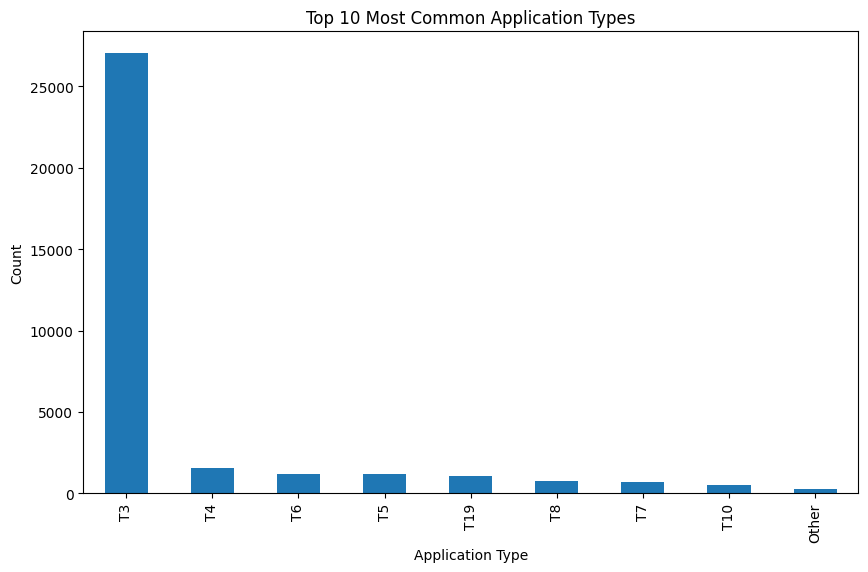

In [18]:

# Create a bar plot of the top 10 most common APPLICATION_TYPES
top_10_app_types = application_df['APPLICATION_TYPE'].value_counts().head(10)
top_10_app_types.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Most Common Application Types')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.savefig('top_10_app_types.png', bbox_inches='tight')
plt.show()


<ipython-input-19-2feb37e0e26c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(), annot=True, cmap='viridis')


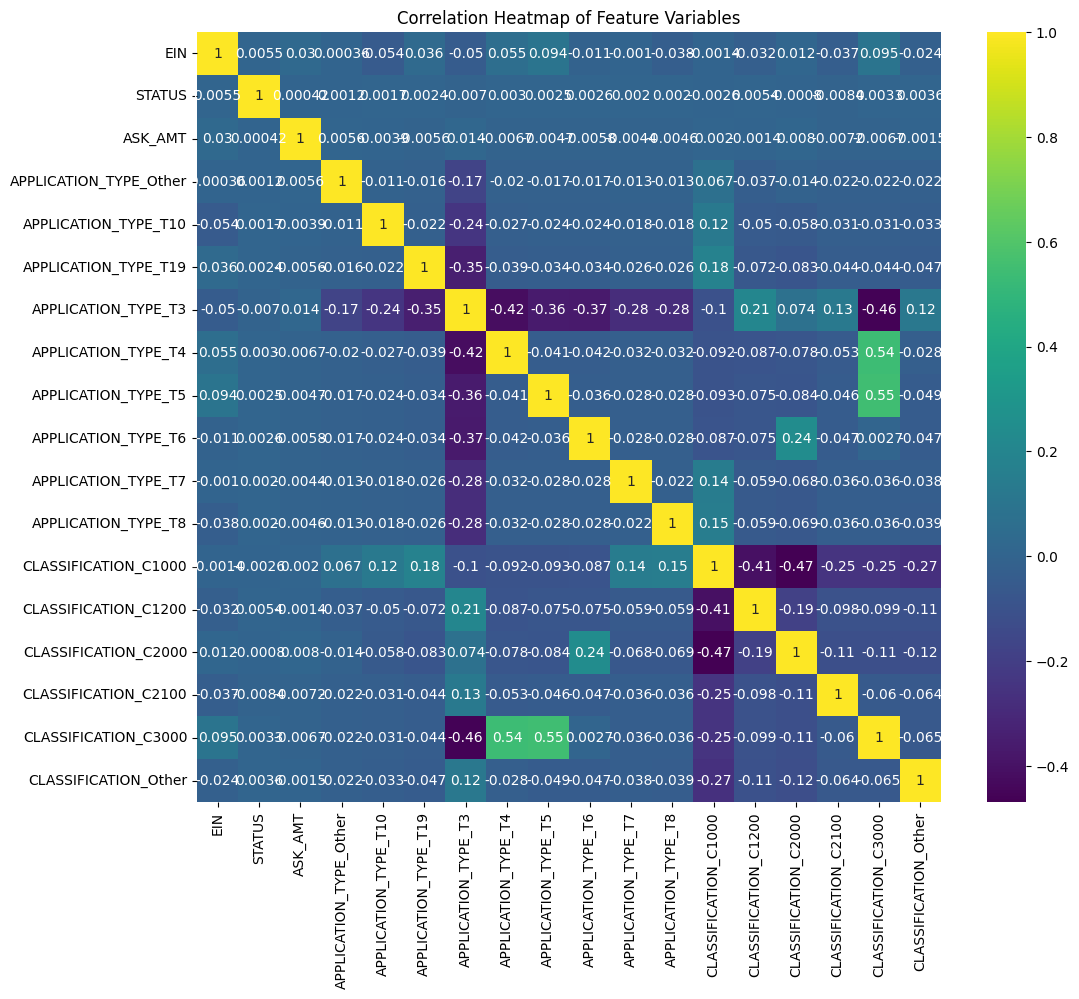

In [19]:
# Create a correlation heatmap of the feature variables
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Feature Variables')
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
# Convert categorical columns to dummy variables with the same set of columns for both training and testing datasets
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Get the columns in the training dataset after encoding
train_cols = X_train_encoded.columns

# Realign the columns in the testing dataset to match those in the training dataset
X_test_encoded = X_test_encoded.reindex(columns=train_cols, fill_value=0)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler to the training data and transform the training and testing data
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

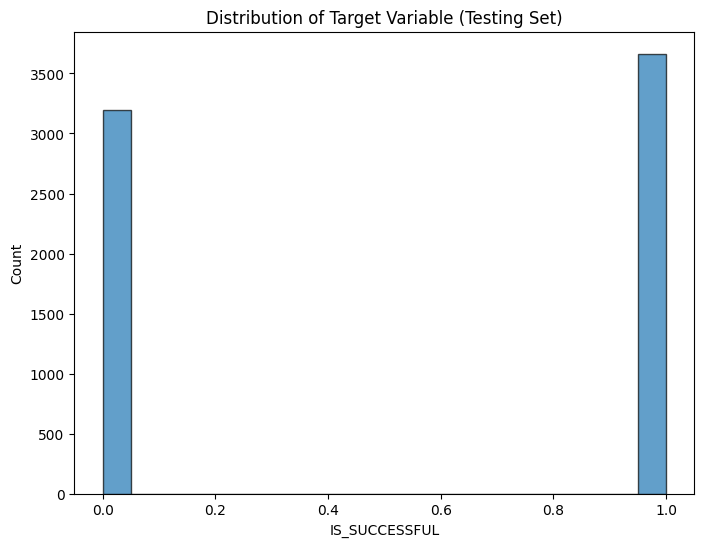

In [21]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable in the training set
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Target Variable (Training Set)')
plt.xlabel('IS_SUCCESSFUL')
plt.ylabel('Count')
plt.savefig('target_distribution_train.png', bbox_inches='tight')

# Plot the distribution of the target variable in the testing set
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Target Variable (Testing Set)')
plt.xlabel('IS_SUCCESSFUL')
plt.ylabel('Count')
plt.savefig('target_distribution_test.png', bbox_inches='tight')

## Compile, Train and Evaluate the Model

In [22]:
# Define the number of input features
input_features = len(X_train.columns)

# Define the number of nodes in each hidden layer
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

# Define the model - deep neural net
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                158280    
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 158341 (618.52 KB)
Trainable params: 158341 (618.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
nn.fit(X_train_scaled, y_train, epochs=100)


In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file

# Define the file path for the exported model
model_path = "your_model.h5"

# Export the model to an HDF5 file
nn.save(model_path)

# Print a message to confirm that the model has been exported
print(f"Model saved to: {model_path}")